#### Imports

In [94]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

#### Put File Name of the Data [Should be in the same directory]

In [106]:
data_file_name = "Lohmans SupplementaryData Ligation observation tables.xlsx"

#### Useful Functions

In [115]:

# INPUT: File name (should be in the same directory as this file)
# OUTPUT: a pandas df file that can access intensities via df["AAA"]["TTT"]
def get_data_matrix(data_file_name): 
    dir_path = os.path.dirname(os.path.realpath("Data Workflow"))
    # pandas dataframe [this is the matrix right from xlsx file]
    df = pd.read_excel(dir_path + "/" + data_file_name)
    # this is changing the index to TTT or AAA as we would like
    df.set_index(df.columns[0], inplace = True)
    return df

# INPUT: A pandas data matrix
# OUTPUT: A numpy array of the form [("AAA", "TTT", [intensity value])]
def get_data_tuple(data_matrix):
    output = []
    for pair_1 in data_matrix.columns: 
        for pair_2 in data_matrix.index:
            tup = (pair_1, pair_2, data_matrix[pair_1][pair_2])
            output.append(tup)
    return np.array(output)

#INPUT: a tuple array of the data
#OUTPUT: a normalized tuple array of the data (helps with comparision)
def normalized_data_tuple(data):
    norm_data = data.copy()
    max_value = max([int(pair[2]) for pair in data])
    for pair in norm_data:
        pair[2] = int(pair[2])/max_value
    return norm_data

#INPUT: data in the form of the tuples [data], whether you want it plotted in log [True, False]
# OUTPUT: None -- it should plot an intensity matrix
def matrix_intensity_plot(data, log = False, name = "Graph 1"):
    # extract unique values for x and y axis
    x_values = sorted(list(set([row[0] for row in data])))
    y_values = sorted(list(set([row[1] for row in data])))
    
    # create empty 2D array to hold data values
    intensity_data = np.zeros((len(x_values), len(y_values)))
    
    # fill in intensity_data with data values
    for row in data:
        x_index = x_values.index(row[0])
        y_index = y_values.index(row[1])
        intensity_data[x_index, y_index] = row[2]
    
    fig, ax = plt.subplots( figsize = (10,10))
    
    if log == True: 
        im = ax.imshow(intensity_data, cmap='viridis', norm = LogNorm())
    else: 
        im = ax.imshow(intensity_data, cmap='viridis')
    
    font = 6
    ax.set_xticks(np.arange(len(y_values)))
    ax.set_yticks(np.arange(len(x_values)))
    ax.set_xticklabels(y_values,  fontsize = font)
    ax.set_yticklabels(x_values, fontsize = font)
    ax.set_xlabel('Y-axis')
    ax.set_ylabel('X-axis')
    ax.set_title(name)
    
    # rotate the x axis labels to make them easier to read
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
    
    # create a colorbar legend for the plot
    cbar = ax.figure.colorbar(im, ax=ax)
    
    # show the plot
    plt.show()

#### Example of Plotting

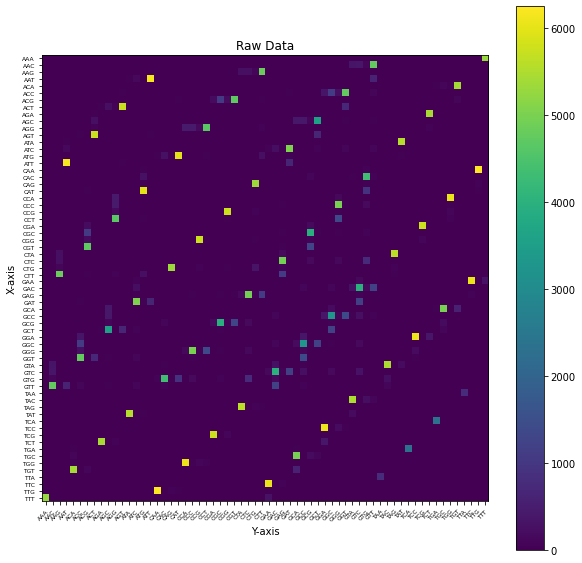

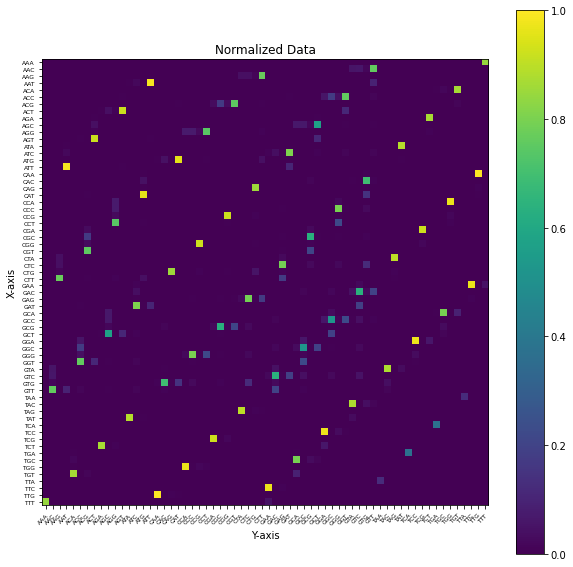

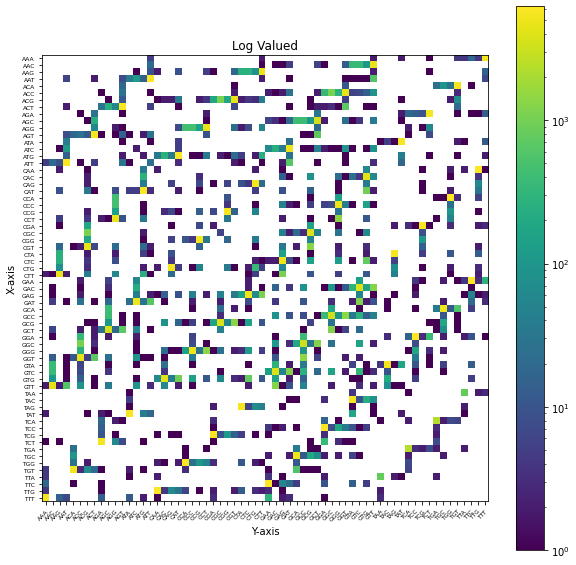

In [118]:
# getting data from the file to a matrix
matrix = get_data_matrix(data_file_name)
# flattinging it into the form e.g. ("AAA", "TTT", 5)
tuples = get_data_tuple(matrix)
# formalizing the outputs
x = normalized_data_tuple(tuples)
# now plotting the intensity matrix
matrix_intensity_plot(tuples, name = "Raw Data")
matrix_intensity_plot(x, name = "Normalized Data")
matrix_intensity_plot(tuples, log = True, name = "Log Valued")